In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
import warnings
warnings.filterwarnings('ignore')
# 불러오는 파일만 바꿔줌
best = pd.read_excel('BestLoanList_전체_전체_강원.xlsx')
best = best
best

,순위,서명,저자,출판사,출판년도,권,ISBN,ISBN부가기호,KDC,대출건수
0,1,달러구트 꿈 백화점 :이미예 장편소설,지은이: 이미예,팩토리나인,2020,NaN,9791165341909,3810.0,813.7,310
1,2,흔한남매,원작: 흔한남매 ;그림: 유난희,미래엔,2019,3.0,9791164134267,77810.0,810.0,255
2,2,흔한남매,원작: 흔한남매 ;그림: 유난희,미래엔,2019,6.0,9791164136261,77810.0,810.0,255
3,4,흔한남매,원작: 흔한남매 ;그림: 유난희,미래엔,2019,7.0,9791164137527,77810.0,810.0,243
4,5,흔한남매,원작: 흔한남매 ;그림: 유난희,미래엔,2019,5.0,9791164135592,77810.0,810.0,238
...,...,...,...,...,...,...,...,...,...,...
195,188,천 개의 파랑 :천선란 장편소설,지은이: 천선란,허블,2020,NaN,9791190090261,3810.0,813.7,85
196,188,(백종원의) 도전 요리왕 :음식으로 맛보는 세계 역사 문화 체험,"글: 백종원,그림: 이정태",위즈덤하우스 미디어그룹,2019-2020,4.0,9791190630016,74900.0,594.0,85
197,198,Go go 카카오 프렌즈 :세계 역사 문화 체험 학습만화,글: 김미영 ;그림: 김정한,북이십일,2018,2.0,9788950974329,74900.0,980.2,84
198,198,미움받을 용기 :자유롭고 행복한 삶을 위한 아들러의 가르침,"기시미 이치로,전경아 옮김",인플루엔셜,2014,NaN,9788996991342,13180.0,189.2,84


In [2]:
# 널값이 없음을 확인하는 과정 결과값이 없어야함
best[best['KDC'].isnull()]

,순위,서명,저자,출판사,출판년도,권,ISBN,ISBN부가기호,KDC,대출건수


In [3]:
# 필요한 컬럼만 가져오고 타입변환
best = best.loc[:,['순위','서명','KDC','대출건수']]
best.dropna(inplace=True)
best.KDC = best.KDC.astype('str')
best.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   순위      200 non-null    int64 
 1   서명      200 non-null    object
 2   KDC     200 non-null    object
 3   대출건수    200 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 7.8+ KB


In [4]:
import numpy as np
# KDC 분류에 따라 구분하기 위해 앞 숫자로 구분해 변수에 넣기
best9 = best[best['KDC'].str.startswith('9',na=False)]
best8 = best[best['KDC'].str.startswith('8',na=False)]
best7 = best[best['KDC'].str.startswith('7',na=False)]
best6 = best[best['KDC'].str.startswith('6',na=False)]
best5 = best[best['KDC'].str.startswith('5',na=False)]
best4 = best[best['KDC'].str.startswith('4',na=False)]
best3 = best[best['KDC'].str.startswith('3',na=False)]
best2 = best[best['KDC'].str.startswith('2',na=False)]
best1 = best[best['KDC'].str.startswith('1',na=False)]
best0 = best[best['KDC'].str.startswith('0',na=False)]
best9 = best9['KDC'].count()
best8 = best8['KDC'].count()
best7 = best7['KDC'].count()
best6 = best6['KDC'].count()
best5 = best5['KDC'].count()
best4 = best4['KDC'].count()
best3 = best3['KDC'].count()
best2 = best2['KDC'].count()
best1 = best1['KDC'].count()
best0 = best0['KDC'].count()

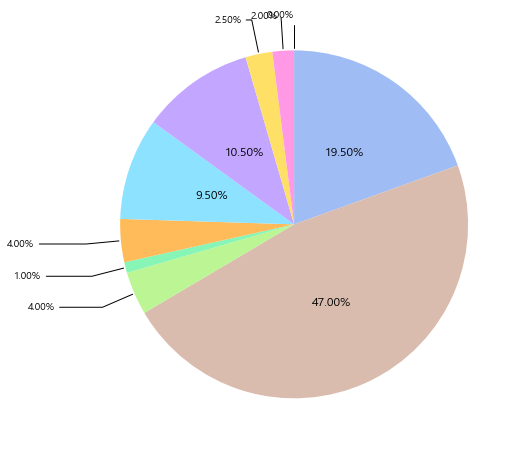

In [5]:


## 안 쓰는 코드!!!!!
## 시도했지만 실패했다!!!!!!!

colors = ['#9fbcf5','#d9bcad','#bcf593','#87f5b5','#ffba59','#8ce2ff','#c3a6ff','#ffe066','#ff99e5'] ## 색상
labels = ['역사','문학','언어','예술','기술과학','자연과학','사회과학','종교','철학','총류'] ## 라벨
frequency = [best9,best8,best7,best6,best5,best4,best3,best2,best1,best0] ## 빈도
 
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(frequency, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계방향으로 그려짐
       colors = colors, ## 색상 지정
       )
 
total = np.sum(frequency) ## 빈도수 합
 
threshold = 5 ## 상한선 비율
sum_pct = 0 ## 퍼센티지
 
bbox_props = dict(boxstyle='square',fc='w',ec='w',alpha=0) ## annotation 박스 스타일
 
## annotation 설정
config = dict(arrowprops=dict(arrowstyle='-'),bbox=bbox_props,va='center')
 
for i,l in enumerate(labels):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
    center, r = ax.patches[i].center, ax.patches[i].r ## 원의 중심 좌표와 반지름길이
    
    if i < len(labels) - 1:
        sum_pct += float(f'{frequency[i]/total*100:.2f}')
        text = f'{frequency[i]/total*100:.2f}%'
    else: ## 마지막 파이 조각은 퍼센티지의 합이 100이 되도록 비율을 조절
        text = f'{100-sum_pct:.2f}%'
    
    ## 비율 상한선보다 작은 것들은 Annotation으로 만든다.
    if frequency[i]/total*100 < threshold:
        ang = (ang1+ang2)/2 ## 중심각
        x = np.cos(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 x좌표
        y = np.sin(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 y좌표
        
        ## x좌표가 양수이면 즉 y축을 중심으로 오른쪽에 있으면 왼쪽 정렬
        ## x좌표가 음수이면 즉 y축을 중심으로 왼쪽에 있으면 오른쪽 정렬
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang) ## 시작점과 끝점 연결 스타일
        config["arrowprops"].update({"connectionstyle": connectionstyle}) ## 
        ax.annotate(text, xy=(x, y), xytext=(1.5*x, 1.2*y),
                    horizontalalignment=horizontalalignment, **config)
    else:
        x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
        ax.text(x,y,text,ha='center',va='center',fontsize=12)
    
# plt.legend(pie[0],labels,loc='upper right') ## 범례
plt.show()

ValueError: 'explode' must be of length 'x'

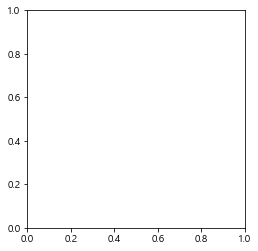

In [6]:
## 실패
group_sizes = [95, 54, 25]
group_colors = ['#9fbcf5','#d9bcad','#bcf593','#87f5b5','#ffba59','#8ce2ff','#c3a6ff','#ffe066','#ff99e5'] ## 색상
group_names = ['역사','문학','언어','예술','기술과학','자연과학','사회과학','종교','철학','총류'] ## 라벨
group_sizes = [best9,best8,best7,best6,best5,best4,best3,best2,best1,best0] ## 빈도
group_explodes = (0.1, 0, 0)
# fig = plt.figure(figsize=(8,8)) ## 캔버스 생성

plt.pie(group_sizes, 
        explode=group_explodes, 
        labels=group_names, 
        colors=group_colors, 
        autopct='%.1f%%', # second decimal place
        shadow=True, 
        startangle=90,
        textprops={'fontsize': 14}) # text font size

plt.axis('equal') #  equal length of X and Y axis

plt.title('Pie Chart of Market Share', fontsize=20)

plt.show()




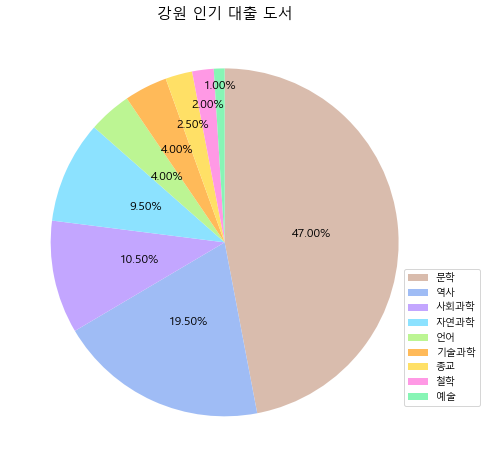

In [7]:
import matplotlib.pyplot as plt
import numpy as np
 
## 데이터 준비
colors = ['#9fbcf5','#d9bcad','#bcf593','#87f5b5','#ffba59','#8ce2ff','#c3a6ff','#ffe066','#ff99e5'] ## 색상 ## 색상
labels = ['역사','문학','언어','예술','기술과학','자연과학','사회과학','종교','철학','총류'] ## 라벨 ## 라벨
frequency = [best9,best8,best7,best6,best5,best4,best3,best2,best1,best0] ## 빈도
 
## 데이터 라벨, 빈도수, 색상을 빈도수를 기준으로 정렬해야한다.
labels_frequency = zip(labels,frequency,colors) 
labels_frequency = sorted(labels_frequency,key=lambda x: x[1],reverse=True)
 
sorted_labels = [x[0] for x in labels_frequency] ## 정렬된 라벨
sorted_frequency = [x[1] for x in labels_frequency] ## 정렬된 빈도수
sorted_colors = [x[2] for x in labels_frequency] ## 정렬된 색상
 
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(sorted_frequency, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계방향으로 그려짐
       colors = sorted_colors, ## 색상 지정
       )
 
total = np.sum(frequency) ## 빈도수 합
 
threshold = 5
sum_pct = 0 ## 퍼센티지
count_less_5pct = 0 ## 5%보다 작은 라벨의 개수
spacing = 0.1
# spacing1 = 0.3
for i,l in enumerate(sorted_labels):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
    center, r = ax.patches[i].center, ax.patches[i].r ## 파이의 중심 좌표
    
    ## 비율 상한선보다 작은 것들은 계단형태로 만든다.
    if sorted_frequency[i]/total*100 < threshold:
        x = (r/2+spacing*count_less_5pct)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2+spacing*count_less_5pct)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
        count_less_5pct += 1
    else:
        x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
        
 
    
    
    ## 퍼센티지 출력
    if i < len(labels) - 1:
        sum_pct += float(f'{sorted_frequency[i]/total*100:.2f}')
        ax.text(x,y,f'{sorted_frequency[i]/total*100:.2f}%',ha='center',va='center',fontsize=12)
        ax.text
#         ax.text(x,y,sorted_labels[i])
    else: ## 마지막 파이 조각은 퍼센티지의 합이 100이 되도록 비율을 조절
        ax.text(x,y,f'{100-sum_pct:.2f}%',ha='center',va='center',fontsize=12)
plt.title('강원 인기 대출 도서',fontsize=15)
plt.legend(pie[0],sorted_labels,bbox_to_anchor=(0.9, 0.45)) ## 범례
plt.savefig('kangwon.png')
plt.show()

In [ ]:
# 실패
group_names = ['역사','문학','언어','예술','기술과학','자연과학','사회과학','종교','철학','총류']
group_sizes = [best9,best8,best7,best6,best5,best4,best3,best2,best1,best0]
group_colors = ['#9fbcf5','#d9bcad','#bcf593','#87f5b5','#ffba59','#8ce2ff','#c3a6ff','#ffe066','#ff99e5']
# group_explodes = (0.5, 0, 0) # explode 1st slice

## 데이터 라벨, 빈도수, 색상을 빈도수를 기준으로 정렬해야한다.
labels_frequency = zip(group_names,group_sizes,group_colors) 
labels_frequency = sorted(labels_frequency,key=lambda x: x[1],reverse=True)
 
sorted_labels = [x[0] for x in labels_frequency] ## 정렬된 라벨
sorted_frequency = [x[1] for x in labels_frequency] ## 정렬된 빈도수
sorted_colors = [x[2] for x in labels_frequency] ## 정렬된 색상
fig = plt.figure(figsize=(8,8)) 
ax = fig.add_subplot() ## 프레임 생성

pie = ax.pie(sorted_frequency, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계방향으로 그려짐
       colors = sorted_colors, ## 색상 지정
#     group_sizes, 
#         labels=group_names, 
#         colors=group_colors, 
#         autopct='%1.2f%%', # second decimal place
#         shadow=True, 
#         startangle=90,
#         textprops={'fontsize': 14}
            ) # text font size

total = np.sum(frequency) ## 빈도수 합
 
threshold = 5
sum_pct = 0 ## 퍼센티지
count_less_5pct = 0 ## 5%보다 작은 라벨의 개수
spacing = 0.1
# spacing1 = 0.3
for i,l in enumerate(sorted_labels):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
    center, r = ax.patches[i].center, ax.patches[i].r ## 파이의 중심 좌표
    
    ## 비율 상한선보다 작은 것들은 계단형태로 만든다.
    if sorted_frequency[i]/total*100 < threshold:
        x = (r/2+spacing*count_less_5pct)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2+spacing*count_less_5pct)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
        count_less_5pct += 1
    else:
        x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
        
 
    
    
    ## 퍼센티지 출력
    if i < len(labels) - 1:
        sum_pct += float(f'{sorted_frequency[i]/total*100:.2f}')
        ax.text(x,y,f'{sorted_frequency[i]/total*100:.2f}%',ha='center',va='center',fontsize=12)
#         ax.text(x,y,sorted_labels[i])
    else: ## 마지막 파이 조각은 퍼센티지의 합이 100이 되도록 비율을 조절
        ax.text(x,y,f'{100-sum_pct:.2f}%',ha='center',va='center',fontsize=12)
        
plt.show()
